In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import utils

# モデルの読み込み
# model = YOLO(f"./models/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.pt")
model = YOLO(f"./models/20230720-1229_yolov8n_sentan-B2/weights/best.pt")

# YOLOv8のコンソール出力を停止
from logging import getLogger
logger = getLogger('ultralytics')
logger.disabled = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ローカルのデータセットの画像で推論を確認

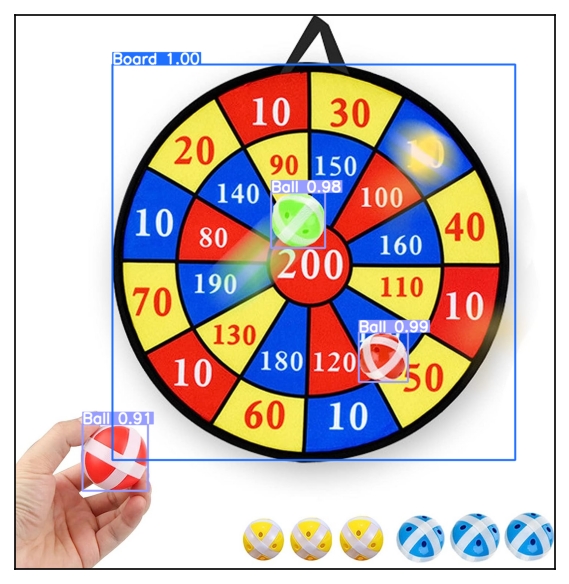

In [4]:
input_img_path = [
    Path("./data/dartboard_sample_02.jpg")
]

for img_path in input_img_path:
    result = model(
                    source    = cv2.imread(str(img_path))[:,:,::-1],
                    conf      = 0.4,
                    iou       = 0.001,
                    save      = False,
                    max_det   = 300,
                    augment   = True,
                    classes   = None, # [1, 2, 3],
                )

    utils.show_img(result[0].plot())
